In [2]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sb
import math
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

El formato xlsx se pasó a csv por cuestion de comodidad.

In [3]:
#Se genera el data frame con el que se va a entrenar el modelo 
df = pd.read_csv('bike_train.csv')

In [4]:
#Se verfiican los tipos de datos y se verifica que no hayan datos nulos 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11999 entries, 0 to 11998
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     11999 non-null  int64  
 1   dteday      11999 non-null  object 
 2   season      11999 non-null  int64  
 3   yr          11999 non-null  int64  
 4   mnth        11999 non-null  int64  
 5   hr          11999 non-null  int64  
 6   holiday     11999 non-null  int64  
 7   weekday     11999 non-null  int64  
 8   workingday  11999 non-null  int64  
 9   weathersit  11999 non-null  int64  
 10  temp        11999 non-null  float64
 11  atemp       11999 non-null  float64
 12  hum         11999 non-null  float64
 13  windspeed   11999 non-null  float64
 14  casual      11999 non-null  int64  
 15  registered  11999 non-null  int64  
 16  cnt         11999 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 1.6+ MB


In [5]:
#Se toman en cuenta las columnas con las que se va a entrenar el modelo
feature_cols = ['season','yr','mnth','hr','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed']
X = df.loc[:, feature_cols]

In [6]:
#Se toma la columna a predecir
y = df['cnt']

In [7]:
#Eligir tamaño de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state= 0) 

In [8]:
#Definir modelo
xgbr = XGBRegressor()

In [9]:
#Entrenar modelo
xgbr.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

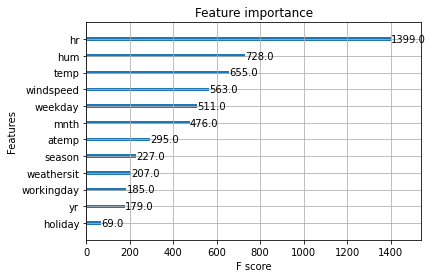

In [10]:
#Visualizar la importancia de los parámetros para el modelo
xgb.plot_importance(xgbr, ax = plt.gca())

In [11]:
#Se genera la predicción de test
predictions = xgbr.predict(X_test)

In [29]:
#Visualización de el valor de la primera predicción
predictions[0]

125.56248

In [14]:
#Visualización de el valor real de la predicción 
y_test.iloc[0]

114

Se realiza la revisiíon del modelo de entrenamiento

In [15]:
pred_train =xgbr.predict(X_train)

In [32]:
# RMSE del modelo de entrenamiento
print('RMSE del modelo de entrenamiento', r2_score(y_train,pred_train))


RMSE del modelo de entrenamiento 0.978960590470245


In [33]:
#MSE del modelo de entrenamiento

print('MSE del modelo de entrenamiento', mean_squared_error(y_train,pred_train))

MSE del modelo de entrenamiento 480.33131395635826


Se realiza la revisiíon del modelo de prueba

In [35]:
# RMSE del modelo de entrenamiento
print('RMSE del modelo de prueba' ,xgbr.score(X_test,y_test))

RMSE del modelo de prueba 0.9456747374086383


In [36]:
#MSE del modelo de prueba
print('MSE del modelo de prueba', mean_squared_error(y_test,predictions))

MSE del modelo de prueba 1263.9329083770738


Datos para predicción

In [37]:
#Se genera el data frame de  los datos a predecir
df1 = pd.read_csv('bike_test.csv')

In [21]:
#Se toman en cuenta las mismas columnas que las del modelo de entrenamiento
X1 = df1.loc[:, feature_cols]

In [22]:
#Se genera la predicción
test = xgbr.predict(X1)

In [24]:
#Se genera la lista de los valores de predicción
lista = test.tolist()

In [26]:
#Se genera el data frame de los valores de predicción
pred = pd.DataFrame(lista, columns = ['pred'])

In [27]:
#Se visualiza el data frame de las prediccones
pred

,pred
0,14.042509
1,29.756645
2,41.408112
3,178.576233
4,203.654831
...,...
5375,233.551041
5376,142.898804
5377,109.594650
5378,60.042805


In [28]:
#Se genera el csv de las predicciones
pred.to_csv('Lionmisfits.csv', index = False)